In [1]:
# IMPORTS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12, 10))


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

In [2]:
# Cargar el dataset
file_path = './forestfires.csv'
df = pd.read_csv(file_path)

In [3]:
# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
print(df.head())

Primeras filas del dataset:
   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


In [4]:
# Información general del dataset
print("\nInformación del dataset:")
print(df.info())


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB
None


In [5]:
# Estadísticas descriptivas del dataset
print("\nEstadísticas descriptivas del dataset:")
print(df.describe())


Estadísticas descriptivas del dataset:
                X           Y        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807   90.644681  110.872340  547.940039    9.021663   
std      2.313778    1.229900    5.520111   64.046482  248.066192    4.559477   
min      1.000000    2.000000   18.700000    1.100000    7.900000    0.000000   
25%      3.000000    4.000000   90.200000   68.600000  437.700000    6.500000   
50%      4.000000    4.000000   91.600000  108.300000  664.200000    8.400000   
75%      7.000000    5.000000   92.900000  142.400000  713.900000   10.800000   
max      9.000000    9.000000   96.200000  291.300000  860.600000   56.100000   

             temp          RH        wind        rain         area  
count  517.000000  517.000000  517.000000  517.000000   517.000000  
mean    18.889168   44.288201    4.017602    0.021663    12.847292  
std      5.806625   16.

In [6]:
# Verificar valores nulos en el dataset
print("\nValores nulos en el dataset:")
print(df.isnull().sum())


Valores nulos en el dataset:
X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64


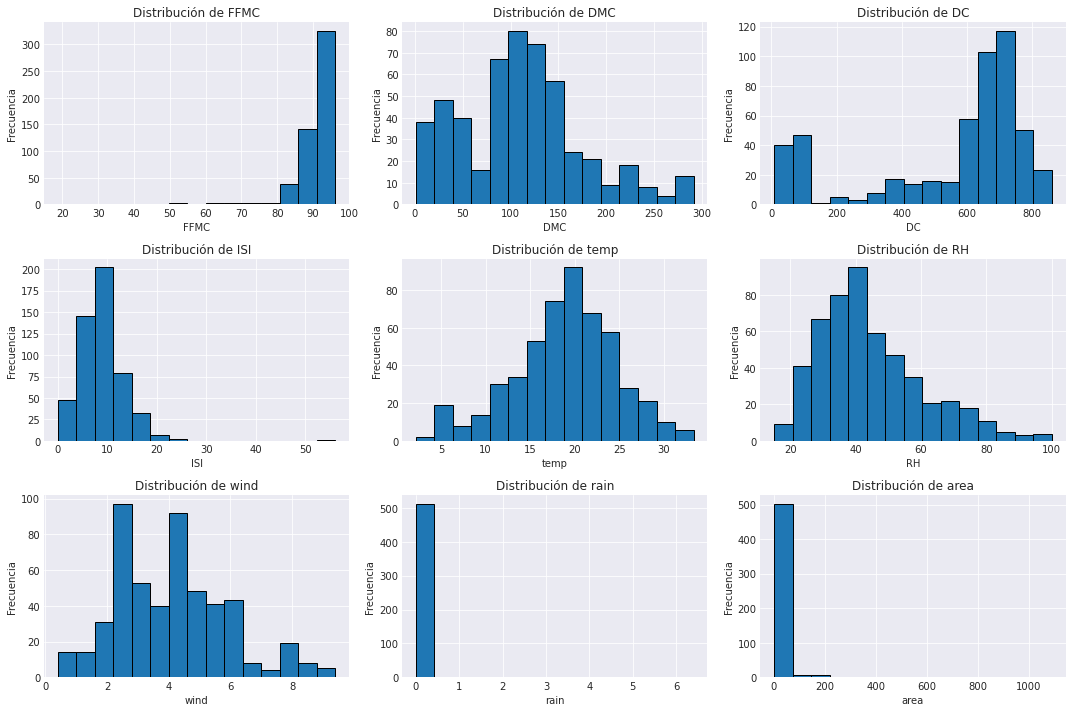

In [7]:
# Gráfico de distribución para las columnas numéricas
numeric_columns = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']
df[numeric_columns].hist(bins=15, figsize=(15, 10), layout=(3, 3), edgecolor='black')

# Añadir títulos y etiquetas a cada gráfico
for ax, col in zip(plt.gcf().axes, numeric_columns):
    ax.set_title(f'Distribución de {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

ValueError: num must be 1 <= num <= 10, not 11

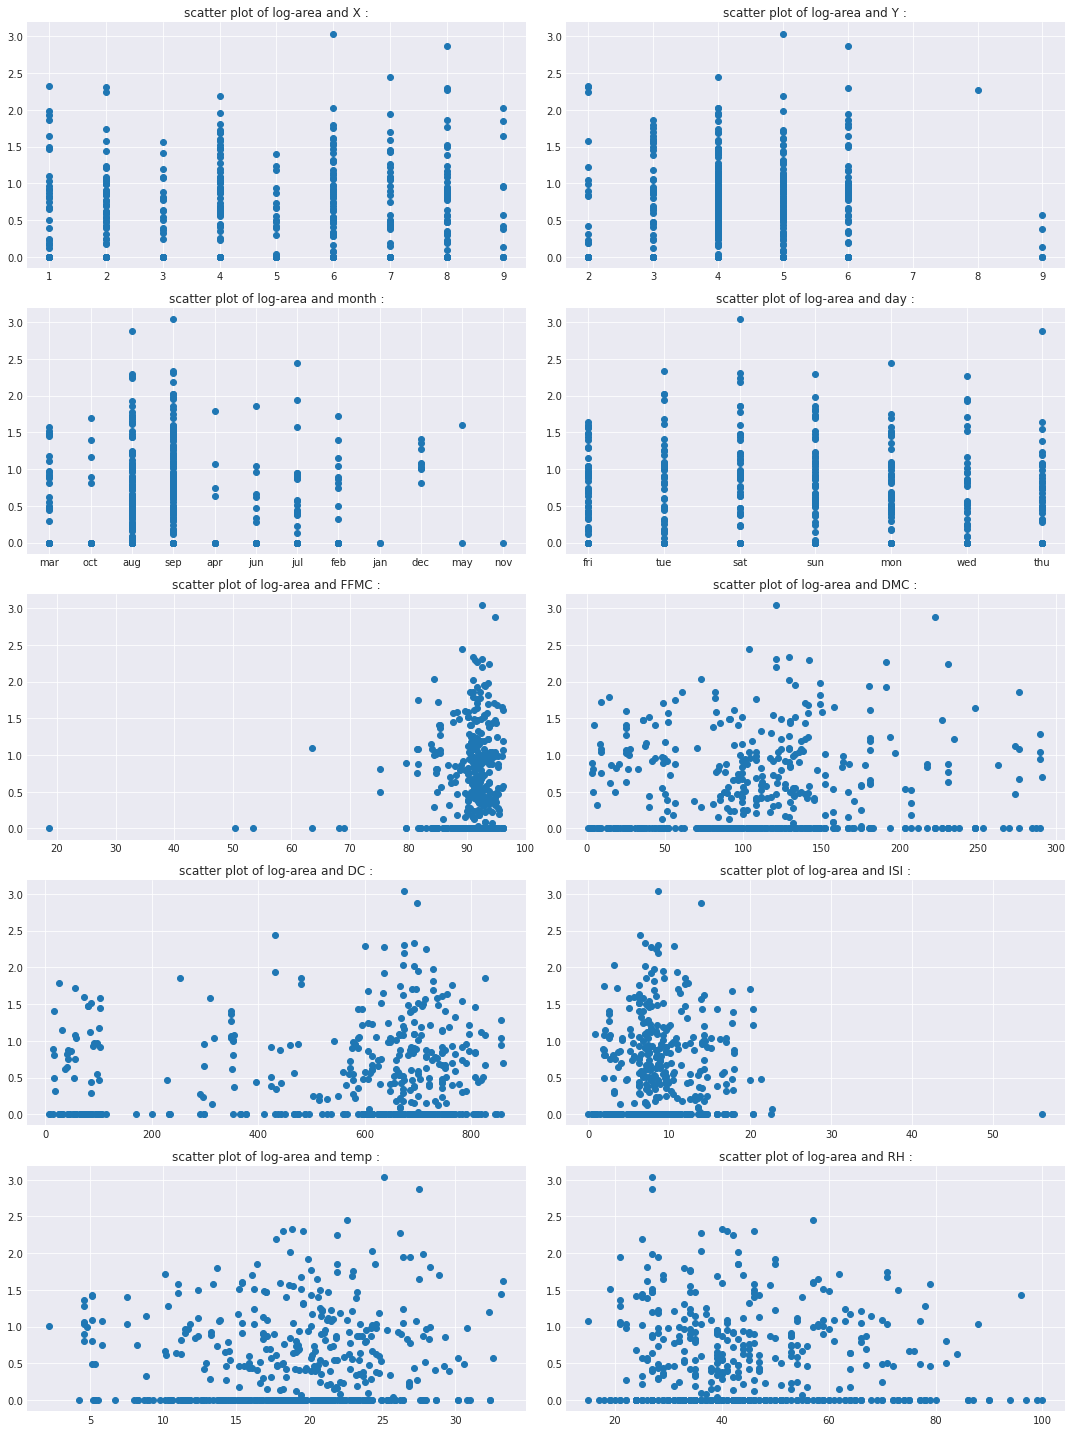

In [8]:
num_data = df.columns.to_list()
df['log-area'] = np.log10(df['area'] + 1)
plt.figure(figsize = (15, 20))

for i, col in enumerate(df[num_data].columns, 1):
    plt.subplot(5, 2, i)
    plt.title(f'scatter plot of log-area and {col} :')
    plt.scatter(df[col], df['log-area'])
    plt.tight_layout()

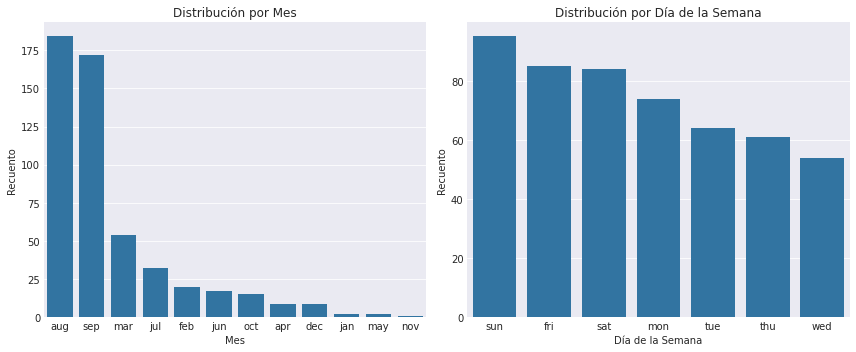

In [9]:
# Gráficos de barras para las columnas categóricas
plt.figure(figsize=(12, 5))

# Distribución por mes
plt.subplot(1, 2, 1)
sns.countplot(x='month', data=df, order=df['month'].value_counts().index)
plt.title('Distribución por Mes')
plt.xlabel('Mes')
plt.ylabel('Recuento')

# Distribución por día de la semana
plt.subplot(1, 2, 2)
sns.countplot(x='day', data=df, order=df['day'].value_counts().index)
plt.title('Distribución por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Recuento')

plt.tight_layout()
plt.show()

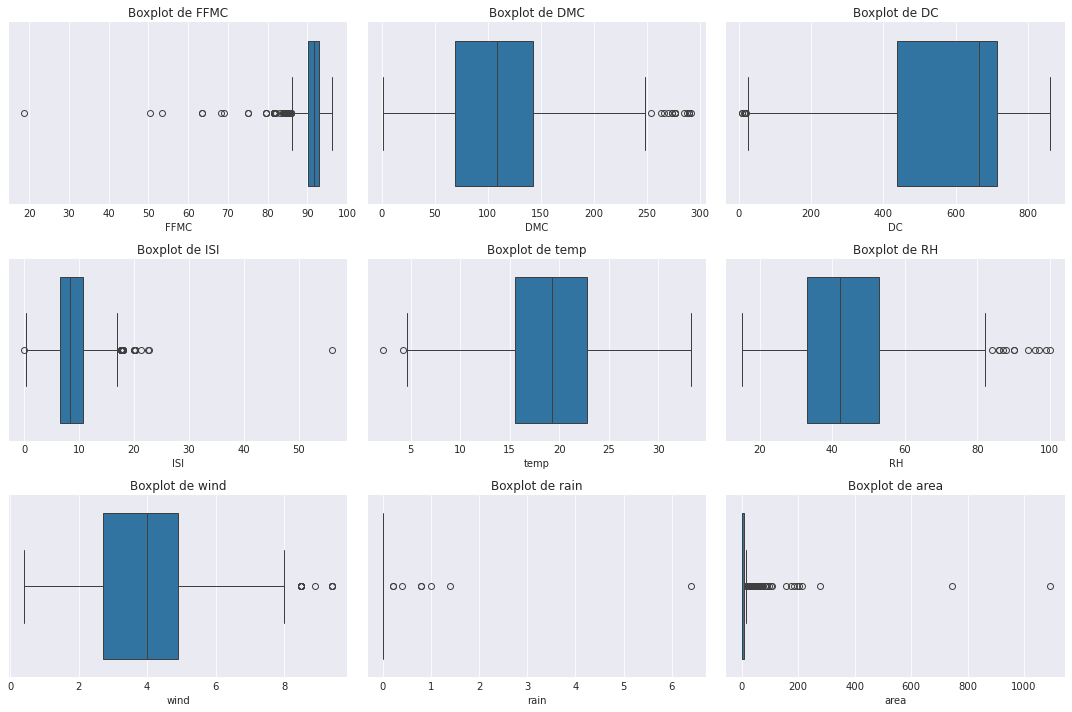

Cantidad de outliers por columna:
FFMC    53
DMC     17
DC       8
ISI     23
temp     2
RH      12
wind    13
rain     8
area    63
dtype: int64


In [10]:
# Crear un boxplot para cada variable numérica
plt.figure(figsize=(15, 10))
numeric_columns = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')

plt.tight_layout()
plt.show()

# Identificación de outliers usando IQR
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).sum()

print("Cantidad de outliers por columna:")
print(outliers)


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el dataset
file_path = './forestfires.csv'
df = pd.read_csv(file_path)

# Codificar variables categóricas
df['month'] = df['month'].astype('category')
df['day'] = df['day'].astype('category')

# Dividir en características y etiqueta
X = df.drop('area', axis=1)
y = df['area']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline de preprocesamiento y modelo
numeric_features = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']
categorical_features = ['month', 'day']

# Preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Modelo
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")


RMSE: 109.66556634087407
R²: -0.020256119669660677


/home/mcabre/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [14]:
# Categorizar FFMC
def categorize_ffmc(value):
    if value <= 30:
        return 'Bajo'
    elif value <= 60:
        return 'Moderado'
    elif value <= 80:
        return 'Alto'
    else:
        return 'Muy Alto'

# Categorizar DMC
def categorize_dmc(value):
    if value <= 10:
        return 'Bajo'
    elif value <= 20:
        return 'Moderado'
    elif value <= 30:
        return 'Alto'
    else:
        return 'Muy Alto'

# Categorizar DC
def categorize_dc(value):
    if value <= 100:
        return 'Bajo'
    elif value <= 200:
        return 'Moderado'
    elif value <= 300:
        return 'Alto'
    else:
        return 'Muy Alto'

# Categorizar ISI
def categorize_isi(value):
    if value <= 3:
        return 'Bajo'
    elif value <= 6:
        return 'Moderado'
    elif value <= 12:
        return 'Alto'
    else:
        return 'Muy Alto'
    
def area_cat(area):
    if area == 0.0:
        return "No damage"
    elif area <= 1:
        return "low"
    elif area <= 25:
        return "moderate"
    elif area <= 100:
        return "high"
    else:
        return "very high"

In [15]:
# Aplicar las funciones de categorización
df['FFMC_category'] = df['FFMC'].apply(categorize_ffmc)
df['DMC_category'] = df['DMC'].apply(categorize_dmc)
df['DC_category'] = df['DC'].apply(categorize_dc)
df['ISI_category'] = df['ISI'].apply(categorize_isi)
df['area_category'] = df['area'].apply(area_cat)

# Verificar las primeras filas del dataframe actualizado
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,FFMC_category,DMC_category,DC_category,ISI_category,area_category
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,Muy Alto,Alto,Bajo,Moderado,No damage
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,Muy Alto,Muy Alto,Muy Alto,Alto,No damage
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,Muy Alto,Muy Alto,Muy Alto,Alto,No damage
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,Muy Alto,Muy Alto,Bajo,Alto,No damage
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,Muy Alto,Muy Alto,Moderado,Alto,No damage


<Figure size 1080x720 with 0 Axes>

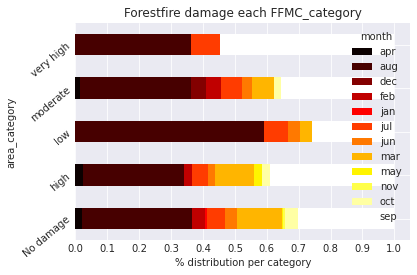

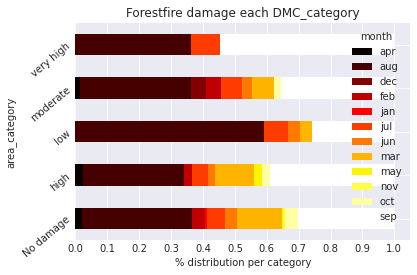

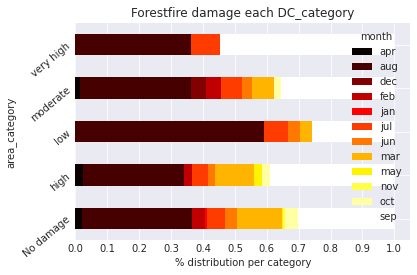

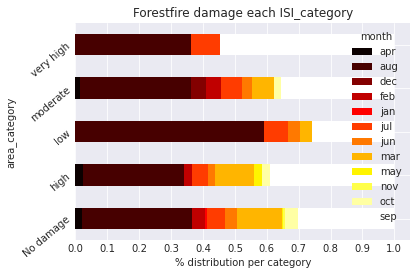

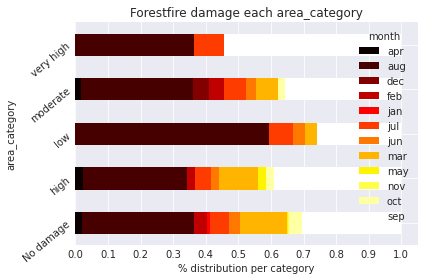

In [29]:

cat_data = df.select_dtypes('object').columns.to_list()
num_data = df.columns.to_list()
for col in cat_data:
    num_data.remove(col)
num_data.remove('area')

plt.figure(figsize=(15, 10))
# categorical columns
for col in cat_data:
    cross = pd.crosstab(index = df['area_category'], columns = df['month'], normalize = 'index')
    cross.plot.barh(stacked = True,rot = 40,cmap = 'hot')
    plt.xlabel('% distribution per category')
    plt.xticks(np.arange(0, 1.1, 0.1))
    plt.title("Forestfire damage each {}".format(col))
    
plt.tight_layout()
plt.show()


/tmp/ipykernel_7983/244122697.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='FFMC_category', palette='hot', ax=axes[0, 0])
/tmp/ipykernel_7983/244122697.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='DMC_category', palette='hot', ax=axes[0, 1])
/tmp/ipykernel_7983/244122697.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='DC_category', palette='hot', ax=axes[1, 0])
/tmp/ipykernel_7983/244122697.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be r

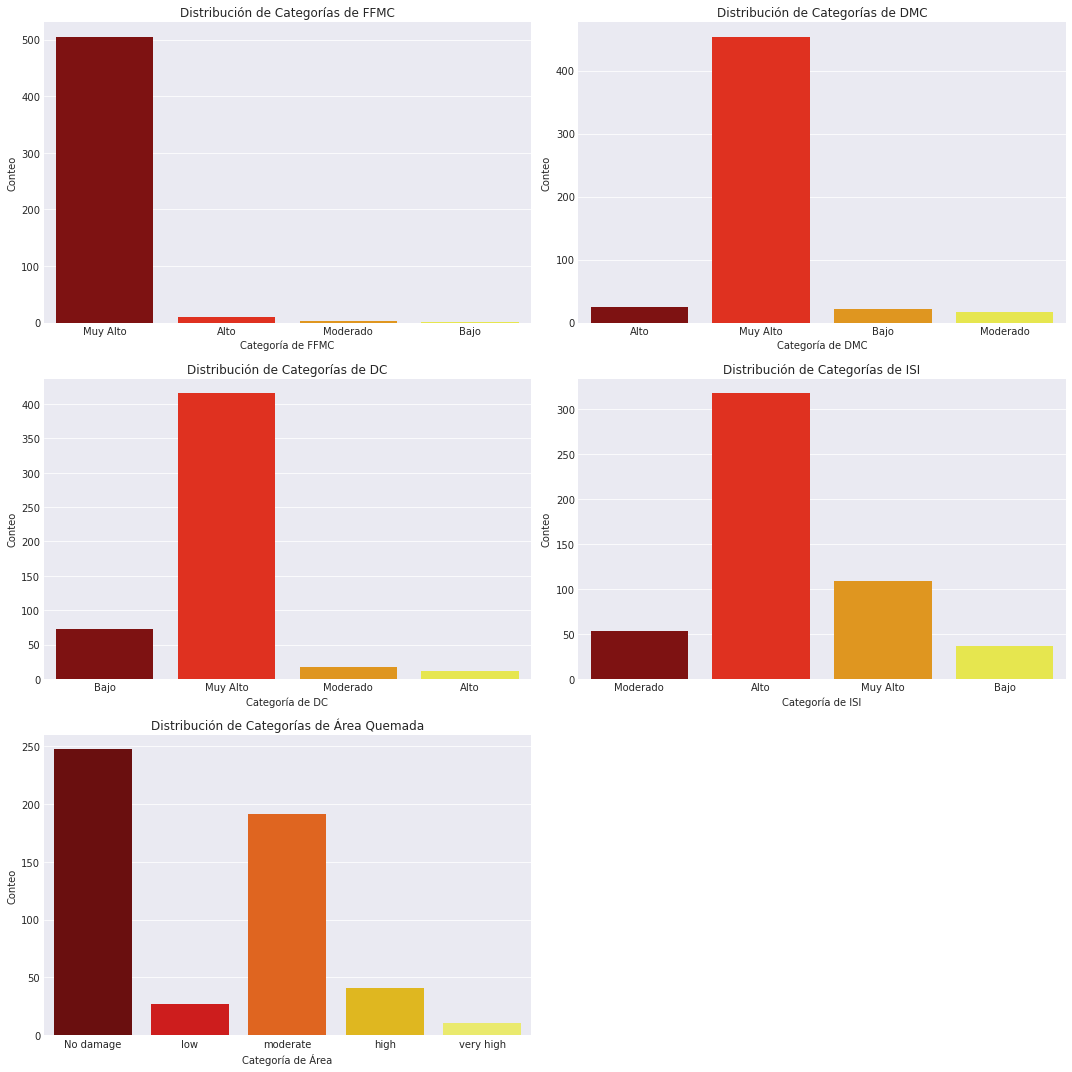

In [40]:
# Crear una figura con subplots organizados en una cuadrícula de 3 filas y 2 columnas
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

sns.countplot(data=df, x='FFMC_category', palette='hot', ax=axes[0, 0])
axes[0, 0].set_title('Distribución de Categorías de FFMC')
axes[0, 0].set_xlabel('Categoría de FFMC')
axes[0, 0].set_ylabel('Conteo')

sns.countplot(data=df, x='DMC_category', palette='hot', ax=axes[0, 1])
axes[0, 1].set_title('Distribución de Categorías de DMC')
axes[0, 1].set_xlabel('Categoría de DMC')
axes[0, 1].set_ylabel('Conteo')

sns.countplot(data=df, x='DC_category', palette='hot', ax=axes[1, 0])
axes[1, 0].set_title('Distribución de Categorías de DC')
axes[1, 0].set_xlabel('Categoría de DC')
axes[1, 0].set_ylabel('Conteo')

sns.countplot(data=df, x='ISI_category', palette='hot', ax=axes[1, 1])
axes[1, 1].set_title('Distribución de Categorías de ISI')
axes[1, 1].set_xlabel('Categoría de ISI')
axes[1, 1].set_ylabel('Conteo')

sns.countplot(data=df, x='area_category', palette='hot', ax=axes[2, 0])
axes[2, 0].set_title('Distribución de Categorías de Área Quemada')
axes[2, 0].set_xlabel('Categoría de Área')
axes[2, 0].set_ylabel('Conteo')

axes[2, 1].axis('off')
plt.tight_layout()
plt.show()
